In [18]:
import time

In [19]:
from selenium.webdriver.common.keys import Keys

In [20]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

In [21]:
from bs4 import BeautifulSoup

In [23]:
#logging_in
from selenium import webdriver
driver=webdriver.Chrome("/Users/User/Web drivers/chromedriver")
driver.get("https://www.instagram.com/")

wait = WebDriverWait(driver, 10)
user= wait.until(EC.presence_of_element_located((By.NAME,"username"))) 
password=driver.find_element_by_name("password")

#fill up username and password
user.send_keys("SAMPLE USERNAME")
password.send_keys("SAMPLE PASSWORD")

login=driver.find_element_by_xpath('//button[@type="submit"]/div')
login.submit()

In [24]:
#save your info pop up
dont_save_info=driver.find_element_by_class_name("sqdOP")
dont_save_info.click()


In [25]:
#turning off notification pop up which comes on logging in
notificatn_off=driver.find_element_by_class_name("HoLwm")
notificatn_off.click()
driver.maximize_window()

# Answer 1.1

In [26]:
#fetching names of the Instagram Handles that are displayed in list after typing “food” 
   
def search_and_open(profile):
    driver.get("https://www.instagram.com/"+profile)
    
   
 #finding number of followers  
def find_number_of_followers(profile):
    search_and_open(profile)
    wait = WebDriverWait(driver, 10)
    wait2= wait.until(EC.presence_of_element_located((By.CLASS_NAME,"-nal3"))) 
    data = driver.page_source
    html_data = BeautifulSoup(data, 'html.parser')
    n= html_data.find_all(class_ = '-nal3')
    
    num_f=n[1].span["title"]

    
    return num_f

        

In [28]:

search=driver.find_element_by_xpath('//input[contains(@class,"XTCLo")]')
search.clear()
search.send_keys("food")
time.sleep(3)

l=driver.find_elements_by_class_name("Ap253")
l=l[:10]
insta_handles=[]
for i in l:
    insta_handles.append(i.get_attribute('innerHTML').strip('#'))
   
    
d={}
for i in insta_handles:
    num_followers=find_number_of_followers((i))
    
    num_followers=num_followers.replace(",","")
    d[i]=int(num_followers)

#finding top 5
sort_d={k: v for k,v in sorted(d.items(), key=lambda item:item[1],reverse=True)}
c=0
print("The top 5 which have the highest number of followers :-")
for i in sort_d:
    if(c==5):
        break
    
    print(c+1,i,"-->",sort_d[i])
    c+=1

The top 5 which have the highest number of followers :-
1 foodnetwork --> 10410205
2 yourfoodlab --> 1327109
3 dilsefoodie --> 566033
4 foodtalkindia --> 299087
5 food --> 61435


# Answer 1.2

In [29]:
driver.get("https://www.instagram.com/")

In [30]:
#counting number of posts these handles have done in the previous 3 days    
def count_posts(profile):
    search_and_open(profile)
    wait = WebDriverWait(driver, 10)
    to_be_count=wait.until(EC.element_to_be_clickable((By.XPATH,'//div[contains(@class,"v1Nh3 kIKUG")]/a')))
    to_be_count.click()
    count=0

    while(True):
        wait = WebDriverWait(driver, 10)
        find= wait.until(EC.presence_of_element_located((By.CLASS_NAME,'c-Yi7'))) 
    
        data = driver.page_source
        html_data = BeautifulSoup(data, 'html.parser')
        date=html_data.find(class_='c-Yi7')
        date=date.time.string
        arr_date=date.split()
    
        #previous 3 day check
        if(arr_date[1]=="day" or arr_date[1]=="days"):
            if(int(arr_date[0])<=3):
                count+=1
            else:
                break
            
        elif(arr_date[1]=="month" or arr_date[1]=="months" or arr_date[1]=="year" or arr_date[1]=="years" ):
            break
        else:
            count+=1
        
        next=driver.find_element_by_class_name('coreSpriteRightPaginationArrow')
        next.click()
    
    driver.get("https://www.instagram.com/")
    time.sleep(2)
    return count    
                                              
    

In [31]:
c=0
names=[]
for i in sort_d:
    if(c==5):
        break
    names.append(i)
    c+=1
    
posts={}
for i in names:
    posts[i]=count_posts(i)
    
print("The number of posts these handles have done in the previous 3 days:-")

for i in posts:
    print(i,"-->",posts[i])

The number of posts these handles have done in the previous 3 days:-
foodnetwork --> 40
yourfoodlab --> 4
dilsefoodie --> 6
foodtalkindia --> 3
food --> 9


# Answer 1.3

In [32]:
import matplotlib.pyplot as plt
from pylab import rcParams

x,y=[],[]
c=0

for i in sort_d:
    if c==5:
        break
    x.append(i)
    y.append(sort_d[i])
    
    c+=1
    
#plotting bar graph.
rcParams['figure.figsize'] = 8,5
plt.bar(x,y)
plt.title('The top 5 handles which have the highest number of followers bar graph.',fontdict={'fontsize':20})
plt.xlabel('Handles ----->')
plt.ylabel('Number of followers ----->')

plt.xticks(rotation=90)
plt.show()

In [33]:
import matplotlib.pyplot as plt
from pylab import rcParams

x,y=[],[]

for i in posts:
    x.append(i)
    y.append(posts[i])
    
    
#plotting bar graph.
rcParams['figure.figsize'] = 8,5
plt.bar(x,y)
plt.title('The number of posts these top 5 handles have done in the previous 3 days bar graph.',fontdict={'fontsize':20})
plt.xlabel('Handles ----->')
plt.ylabel('Number of posts done in the previous 3 days ----->')
plt.xticks(rotation=90)
plt.show()

# Answer 2.1

In [34]:
#scraping content of the 5 food handles obtained before
def scrape_content(profile):
    search_and_open(profile)
    wait = WebDriverWait(driver, 10)
    to_be_scraped=wait.until(EC.element_to_be_clickable((By.XPATH,'//div[contains(@class,"v1Nh3 kIKUG")]/a')))
    to_be_scraped.click()

    content_list=[]
    for i in range(10):
        content = wait.until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "C4VMK")]')))

        data = driver.page_source
        html_data = BeautifulSoup(data, 'html.parser')

        content_data = html_data.find(class_ = 'C4VMK')
        c = content_data.contents[1]
        
        #adding the content of each post
        content_list.append(list(c.stripped_strings))
        
        
        next=driver.find_element_by_class_name('coreSpriteRightPaginationArrow')
        next.click()
        
    driver.get("https://www.instagram.com/")
    time.sleep(2)
    return content_list

In [35]:
contents={}
for i in names:
    contents[i]=scrape_content(i)
    
for i in contents:
    print("Contents of",i,"->")
    q=1
    for j in contents[i]:
        print(q,end=" ")
        q+=1
        for k in j:
            print(k)
            
    print("<----------------------------------------------->")

Contents of foodnetwork ->
1 Four more champions return to the
#Chopped
kitchen for a chance to battle against
@BobbyFlay
in the Beat Bobby Flay finale! Don't miss the action NEXT at 9|8c!
2 Naanzanella Salad (with
@maneetchauhan
)
Using ingredients that might already be in your pantry,
@maneetchauhan
makes an Indian-inspired Naanzanella Salad, complete with deep-fried naan and TWO different kinds of chutney!
#TheKitchen
> Saturdays at 11a|10c
Save the recipe on your
@FoodNetworkKitchen
app.
3 When it comes to grilled chicken, it's alllll about the marinade! Next time you're cooking out, switch things up and try
@jettila
's Grilled Harissa Chicken Breasts with Herbed Couscous. You can take his full class today on your
@FoodNetworkKitchen
app. Link in bio!
4 Our Jiggly Shark Pops have a FINtastic surprise inside! 🦈 🦈⁠
⁠
Watch the finale of
#SharkWeek
tonight at 8|7c on
@Discovery
!⁠
⁠
Click the link in our bio to save the recipe on your
@FoodNetworkKitchen
app!
5 The competition is REAL

# Answer 2.2

Removed all punctuations and emojis and then counted frequency of each word

In [36]:
import re
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

words={}
#removing emojis
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

for i in contents:
   
    for j in contents[i]:
        for m in j:
            w=deEmojify(m)
            #removing punctuations
            w=tokenizer.tokenize(w)
            k=k.strip()
            for k in w:
                k=k.strip()
                k=k.lower()
                words[k]=words.get(k,0)+1

#sorting    
sort_words={k: v for k,v in sorted(words.items(), key=lambda item:item[1],reverse=True)}

print("Words used in all the scraped posts & the frequency of each word :-->")

c=1
for i in sort_words:
    print(c,i,"->",sort_words[i])
    c+=1


Words used in all the scraped posts & the frequency of each word :-->
1 the -> 86
2 and -> 74
3 a -> 62
4 to -> 57
5 of -> 52
6 recipe -> 46
7 in -> 40
8 is -> 40
9 with -> 38
10 this -> 37
11 your -> 33
12 you -> 31
13 on -> 30
14 i -> 30
15 it -> 28
16 my -> 28
17 for -> 21
18 are -> 18
19 at -> 15
20 have -> 14
21 s -> 13
22 us -> 13
23 so -> 13
24 one -> 13
25 that -> 12
26 an -> 12
27 recipes -> 12
28 many -> 12
29 food -> 12
30 up -> 11
31 by -> 11
32 out -> 10
33 sanjyotkeer -> 10
34 some -> 10
35 has -> 10
36 momo -> 10
37 be -> 9
38 we -> 9
39 from -> 9
40 enjoy -> 9
41 chinese -> 9
42 dilsefoodie -> 9
43 t -> 8
44 contest -> 8
45 cookwithatwist -> 8
46 twist -> 8
47 foodie -> 8
48 pocket -> 8
49 tandoori -> 8
50 rum -> 8
51 chutney -> 7
52 when -> 7
53 take -> 7
54 chef -> 7
55 just -> 7
56 morphyrichardsindia -> 7
57 sandwich -> 7
58 now -> 7
59 used -> 7
60 cheers -> 7
61 paneer -> 7
62 momos -> 7
63 need -> 7
64 chance -> 6
65 foodnetworkkitchen -> 6
66 app -> 6
67 chicken

925 importantfoods -> 1
926 mozzarella -> 1
927 tomatosauce -> 1
928 sauce -> 1
929 feedfeed -> 1
930 ice -> 1
931 cream -> 1
932 consttellattioninspration -> 1
933 sweetandsavory -> 1
934 sweet -> 1
935 savory -> 1
936 icecreamsandwich -> 1
937 glad -> 1
938 orangeslush -> 1
939 slushy -> 1
940 oj -> 1
941 orangesoda -> 1
942 gone -> 1
943 niceeating -> 1
944 lobster -> 1
945 lobsterrolls -> 1
946 lobsterroll -> 1
947 august -> 1
948 scroll -> 1
949 left -> 1
950 hungry -> 1
951 thank -> 1
952 quintet -> 1
953 goodness -> 1
954 hipfoodiemom1 -> 1
955 christinavlahoulis -> 1
956 francescotonelli -> 1
957 eatwithcare -> 1
958 beyondcurry -> 1
959 cheesetoast -> 1
960 healthyfood -> 1
961 nutrition -> 1
962 foodphotography -> 1
963 toasty -> 1
964 healthylifestyle -> 1
965 tasty -> 1
966 sweetandsorrel -> 1
967 scallionpancakes -> 1
968 vegan -> 1
969 veganfood -> 1
970 browned -> 1
971 cinnamon -> 1
972 brioche -> 1
973 halfbakedharvest -> 1
974 asap -> 1
975 brownedbutter -> 1
976 cinn

# Answer 2.3

In [37]:
import pandas as pd

dict_words={"Word":list(sort_words.keys()),"Frequency":list(sort_words.values())}
#creating dataframe      
df=pd.DataFrame(dict_words)

#putting into csv file
df.to_csv('Words_with_Frequency.csv',index=False)

# Answer 2.4

In [38]:
import re
from nltk.tokenize import RegexpTokenizer

hashtag={}

#extracting words having hashtags
def extract_hashtags(text): 
      
 
    regex = "#(\w+)"
      

    hashtag_list = re.findall(regex, text) 
    
for i in contents:
   
    for j in contents[i]:
        for m in j:
            w=deEmojify(m)


            w=w.split()
            for k in w:
                k=k.strip()
                k=k.lower()
                
                if("#" in k):
                    hashtag[k]=hashtag.get(k,0)+1

#sorting in desc order   
sort_hashtag={k: v for k,v in sorted(hashtag.items(), key=lambda item:item[1],reverse=True)}

print("The top 10 hashtags that were most popular among these bloggers and number of times used :-->")

c=0
for i in sort_hashtag:
    if(c==10):
        break
    print(c+1,i,"->",sort_hashtag[i])
    c+=1

The top 10 hashtags that were most popular among these bloggers and number of times used :-->
1 #dilsefoodie -> 9
2 #foodie -> 8
3 #food -> 7
4 #cookwithatwist -> 6
5 #indiancuisine -> 6
6 #recipe -> 6
7 #yum -> 6
8 #streetfood -> 5
9 #comfortfood -> 5
10 #contestalert -> 4


# Answer 2.5

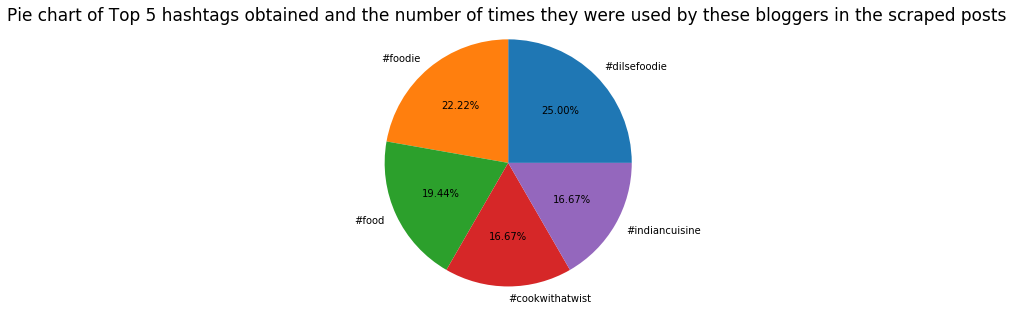

In [39]:
c=0
x=[]
y=[]
for i in sort_hashtag:
    if(c==5):
        break
    x.append(i)
    y.append(sort_hashtag[i])
    c+=1
    
#plotting pie chart.
plt.pie(y,labels=x, autopct = '%.2f%%')
plt.title('Pie chart of Top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts',fontsize=17)
plt.axis('equal')
plt.show()

# Answer 3.1

In [40]:
from selenium.common.exceptions import TimeoutException
#getting number of likes
def get_no_likes(profile):
    search_and_open(profile)
    wait = WebDriverWait(driver, 5)
    first=wait.until(EC.element_to_be_clickable((By.XPATH,'//div[contains(@class,"v1Nh3 kIKUG")]/a')))
    first.click()
    
    number_like=[]
    
    for i in range(10):
        #using try except to differentiate for videos and photos
        try:
            wait = WebDriverWait(driver, 3)
            view_button=wait.until(EC.presence_of_element_located((By.CLASS_NAME,"vcOH2")))
            view_button.click()
            
            like=wait.until(EC.presence_of_element_located((By.CLASS_NAME,"vJRqr")))
            data = driver.page_source
            html_data = BeautifulSoup(data, 'html.parser')
            no_likes=html_data.find(class_="vJRqr").span.string
            no_likes=no_likes.replace(",","")
            no_likes=int(no_likes)
            number_like.append(no_likes)
            
            goto=driver.find_element_by_class_name("QhbhU")
            goto.click()
            next=driver.find_element_by_class_name('coreSpriteRightPaginationArrow')
            next.click()
            
        except TimeoutException:
           
            wait = WebDriverWait(driver, 3)
            like2=wait.until(EC.presence_of_element_located((By.CLASS_NAME,"Nm9Fw")))
            data2= driver.page_source
            html_data2 = BeautifulSoup(data2, 'html.parser')
            no_likes2=html_data2.find(class_="Nm9Fw").button.span.string
            no_likes2=no_likes2.replace(",","")
            no_likes2=int(no_likes2)
            number_like.append(no_likes2)
            next=driver.find_element_by_class_name('coreSpriteRightPaginationArrow')
            next.click()
            
        
    driver.get("https://www.instagram.com/")
    time.sleep(2)
        
    return number_like 
        
        
            
            


In [41]:
number_likes={}
for i in names:
    number_likes[i]=get_no_likes(i)

print("The likes of the top 10 posts of the 5 handles obtained earlier :-")
for i in number_likes:
    print(i,"-->",number_likes[i])

The likes of the top 10 posts of the 5 handles obtained earlier :-
foodnetwork --> [7222, 19422, 6248, 6240, 4292, 6410, 13602, 6405, 19206, 11344]
yourfoodlab --> [19442, 32879, 34549, 25856, 42965, 39030, 27419, 29795, 33274, 21561]
dilsefoodie --> [4670, 8311, 9691, 9431, 7252, 4741, 18356, 7956, 6878, 9885]
foodtalkindia --> [1536, 3276, 993, 4263, 4122, 6494, 1815, 4343, 4583, 3339]
food --> [1176, 1408, 1587, 1344, 1761, 1548, 2651, 870, 803, 1024]


# Answer 3.2

In [43]:
#finding average likes per handle
avg_likes={}
for i in number_likes:
    like=sum(number_likes[i])
    avg_likes[i]=like/10
    
print("The average likes for respective handles :-")

c=1
for i in avg_likes:
    print(c,i,"-->",avg_likes[i])
    c+=1

The average likes for respective handles :-
1 foodnetwork --> 10039.1
2 yourfoodlab --> 30677.0
3 dilsefoodie --> 8717.1
4 foodtalkindia --> 3476.4
5 food --> 1417.2


# Answer 3.3

In [44]:
#finding average likes:followers per handle
ratio={}
for i in names:
    ratio[i]=avg_likes[i]/sort_d[i]
    
print("The average followers:like ratio of each handle :-")

c=1
for i in ratio:
    print(c,i,"-->","%.6f"%ratio[i])
    c+=1


The average followers:like ratio of each handle :-
1 foodnetwork --> 0.000964
2 yourfoodlab --> 0.023116
3 dilsefoodie --> 0.015400
4 foodtalkindia --> 0.011623
5 food --> 0.023068


# Answer 3.4

In [45]:
import matplotlib.pyplot as plt
from pylab import rcParams

x,y=[],[]

for i in avg_likes:
    x.append(i)
    y.append(avg_likes[i])
    
#plotting bar graph.
rcParams['figure.figsize'] = 8,5
plt.bar(x,y)
plt.title('The average likes for respective handles bar graph.',fontdict={'fontsize':20})
plt.xlabel('Handles ----->')
plt.ylabel('Average likes ----->')
plt.xticks(rotation=90)
plt.show()

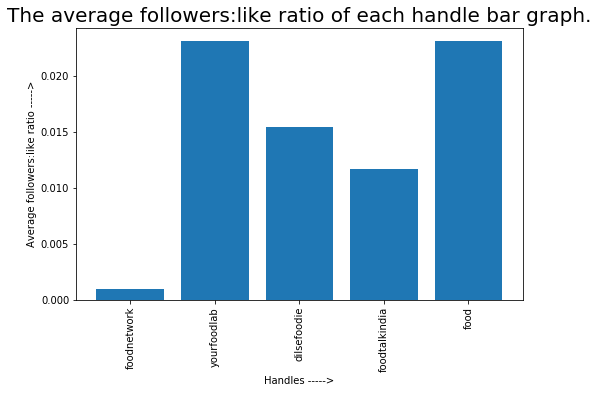

In [46]:
import matplotlib.pyplot as plt
from pylab import rcParams

x,y=[],[]

for i in ratio:
    x.append(i)
    y.append(ratio[i])
    
#plotting bar graph.
rcParams['figure.figsize'] = 8,5
plt.bar(x,y)
plt.title('The average followers:like ratio of each handle bar graph.',fontdict={'fontsize':20})
plt.xlabel('Handles ----->')
plt.ylabel('Average followers:like ratio ----->')
plt.xticks(rotation=90)
plt.show()